In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy
import imageio
from PIL import Image

def read_img(img_name, img_dir = 'images_in/hybrid/', grayscale=False):
    img = Image.open(img_dir + '/' + img_name)
    if grayscale:
        img = img.convert('L')
    img = np.array(img)
    img = img / 255
    return img

def save_img(fname, img_out, out_dir = 'part2_out_dir/part2_2', grayscale=False):
    if '.jpg' not in fname:
        fname = fname + '.jpg'
    full_name = out_dir + '/' + fname
    img_out = np.clip(img_out, a_min=0, a_max=1)
    # img_out = (img_out*255).astype(np.uint8)
    if grayscale:
        imageio.imwrite(full_name, img_out)
    else:
        plt.imsave(full_name, img_out)

# Part 1
### Part 1.1: Finite Difference Operator

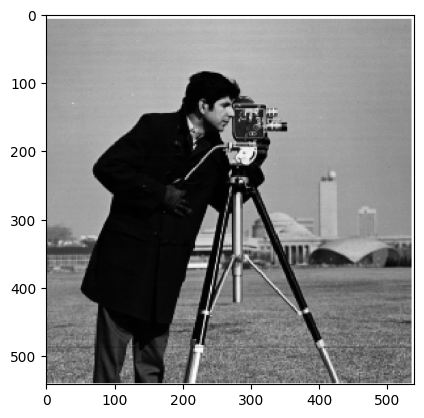

In [4]:
in_dir = 'images_in/filters/'
dx = np.array([[1, -1]])
dy = np.array([[1], [-1]])
def convolve(filter, img):
    res = scipy.signal.convolve(img, filter, mode='same')
    res = np.clip(res, a_min=0, a_max=1)
    return res

cameraman_img = read_img('cameraman.png', in_dir, grayscale=True)
plt.imshow(cameraman_img, cmap='gray')

Lossy conversion from float64 to uint8. Range [-0.8235294117647058, 1.0]. Convert image to uint8 prior to saving to suppress this warning.


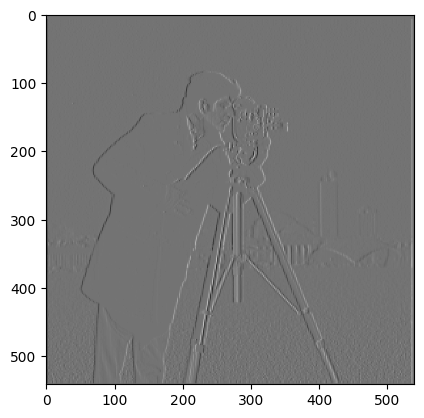

In [492]:
part1_out_dir = 'part1_out_dir'
dx_img = convolve(dx, cameraman_img)
plt.imshow(dx_img, cmap='gray')
save_img('dx_img', dx_img, out_dir=part1_out_dir, grayscale=True)

Lossy conversion from float64 to uint8. Range [-0.6823529411764706, 1.0]. Convert image to uint8 prior to saving to suppress this warning.


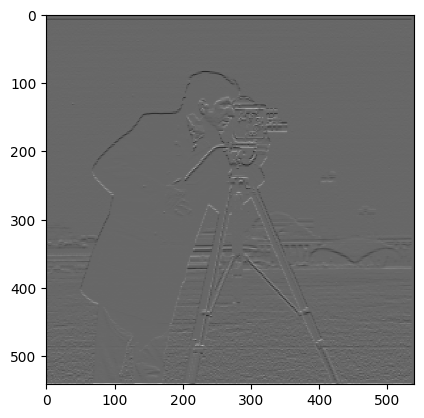

In [301]:
dy_img = convolve(dy, cameraman_img)
plt.imshow(dy_img, cmap='gray')
save_img('dy_img', dy_img, out_dir=part1_out_dir, grayscale=True)

Lossy conversion from float64 to uint8. Range [0.0, 1.4142135623730951]. Convert image to uint8 prior to saving to suppress this warning.


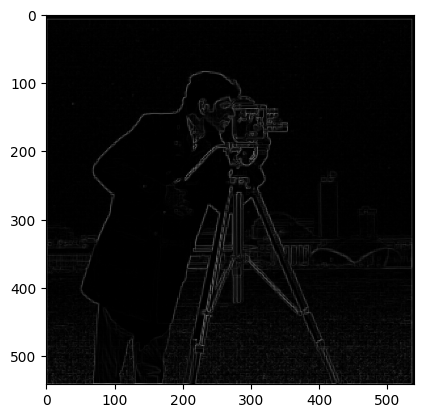

In [302]:
edge_img = np.sqrt(dx_img**2 + dy_img**2)
plt.imshow(edge_img, cmap='gray')
save_img('edge_img', edge_img, out_dir=part1_out_dir, grayscale=True)

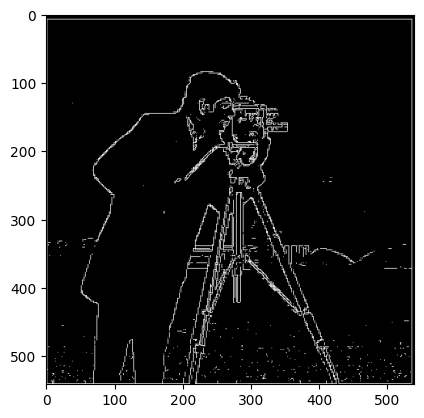

In [303]:
edge_img_thresholded = (edge_img > 0.21).astype(np.uint8) * 255
plt.imshow(edge_img_thresholded, cmap='gray')
save_img('edge_thresholded', edge_img_thresholded, out_dir=part1_out_dir, grayscale=True)

### Part 1.2: Derivative of Gaussian Filter

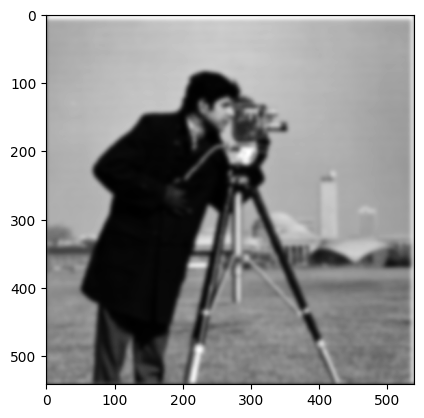

In [5]:
part1_2_out_dir = 'part1_out_dir/part1_2/'

def create_gaussian_2d(sigma=3, ksize=19):
    gaussian_1d = cv2.getGaussianKernel(ksize, sigma)
    gaussian_2d = np.outer(gaussian_1d, gaussian_1d)
    return gaussian_2d

gaussian_2d = create_gaussian_2d()
blurred_cameraman = convolve(gaussian_2d, cameraman_img)
plt.imshow(blurred_cameraman, cmap='gray')

Lossy conversion from float64 to uint8. Range [-0.11516992328257836, 0.49738150178154944]. Convert image to uint8 prior to saving to suppress this warning.


Lossy conversion from float64 to uint8. Range [-0.10628925919742338, 0.5627805252325707]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


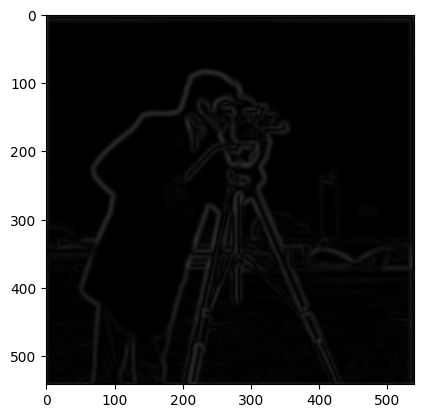

In [305]:
blurred_dx = convolve(dx, blurred_cameraman)
save_img('blurred_dx', blurred_dx, out_dir=part1_2_out_dir, grayscale=True)
blurred_dy = convolve(dy, blurred_cameraman)
save_img('blurred_dy', blurred_dy, out_dir=part1_2_out_dir, grayscale=True)
blurred_edge_img = np.sqrt(blurred_dx**2 + blurred_dy**2)
save_img('blurred_edge', blurred_edge_img, out_dir=part1_2_out_dir, grayscale=True)

plt.imshow(blurred_edge_img, cmap='gray')

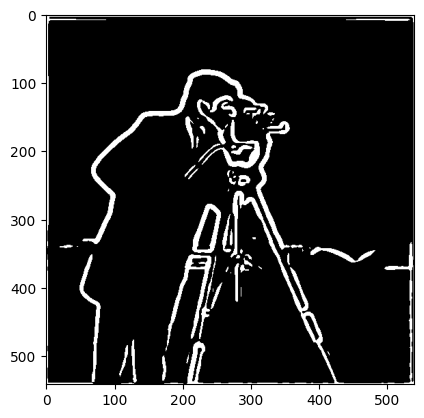

In [306]:
blurred_edge_img_thresholded = ((blurred_edge_img > 0.04) * 255).astype(np.uint8)
save_img('blurred_edge_thresholded', blurred_edge_img_thresholded, out_dir=part1_2_out_dir, grayscale=True)

plt.imshow(blurred_edge_img_thresholded, cmap='gray')

The resulting gradient magnitude image produced by starting with a blurred image has significantly less noise, making it easier to threshold. This is because by applying a Gaussian filter first, we reduce the high frequencies (low pass filter). The threshold can now be lowered to 0.04 from 0.21. Additionally, the edges produced are more prominent and thicker.

Lossy conversion from float64 to uint8. Range [-0.0034659100851356416, 0.0034659100851356416]. Convert image to uint8 prior to saving to suppress this warning.


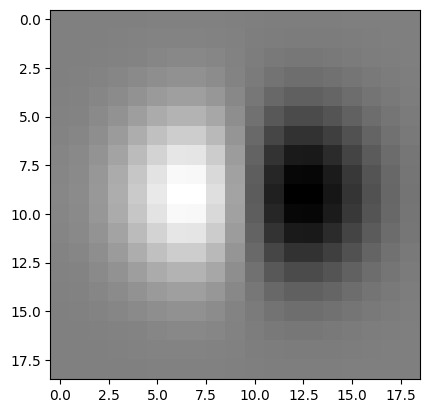

In [307]:
dx_gaussian = convolve(dx, gaussian_2d)
dy_gaussian = convolve(dy, gaussian_2d)

plt.imshow(dx_gaussian, cmap='gray')
save_img('dx_gaussian', dx_gaussian, out_dir=part1_2_out_dir, grayscale=True)

Lossy conversion from float64 to uint8. Range [-0.0034659100851356416, 0.0034659100851356416]. Convert image to uint8 prior to saving to suppress this warning.


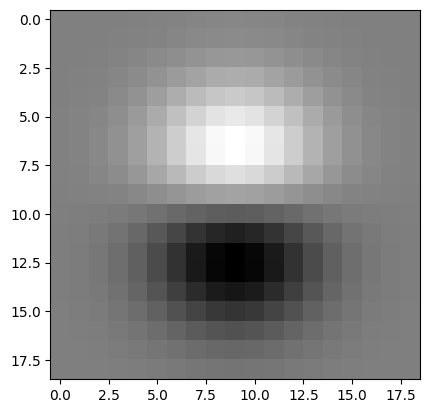

In [308]:
plt.imshow(dy_gaussian, cmap='gray')
save_img('dy_gaussian', dy_gaussian, out_dir=part1_2_out_dir, grayscale=True)

Lossy conversion from float64 to uint8. Range [-0.11392178092133867, 0.11479793545023029]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.10501480388292385, 0.13079871124833628]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


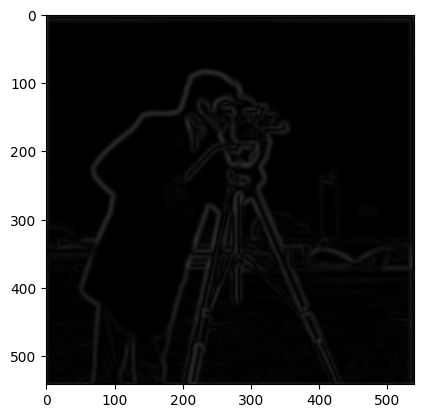

In [309]:
combined_blurred_dx = convolve(dx_gaussian, cameraman_img)
save_img('combined_blurred_dx', combined_blurred_dx, out_dir=part1_2_out_dir, grayscale=True)
combined_blurred_dy = convolve(dy_gaussian, cameraman_img)
save_img('combined_blurred_dy', combined_blurred_dy, out_dir=part1_2_out_dir, grayscale=True)
combined_blurred_edge = np.sqrt(blurred_dx**2 + blurred_dy**2)
save_img('combined_blurred_edge', combined_blurred_edge, out_dir=part1_2_out_dir, grayscale=True)

plt.imshow(combined_blurred_edge, cmap='gray')

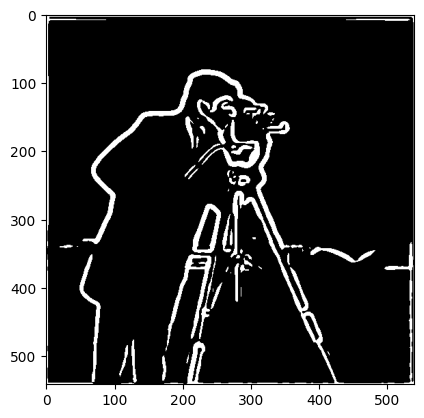

In [310]:
combined_blurred_edge_thresholded = ((combined_blurred_edge > 0.04) * 255).astype(np.uint8)
save_img('combined_blurred_edge_thresholded', combined_blurred_edge_thresholded, out_dir=part1_2_out_dir, grayscale=True)

plt.imshow(combined_blurred_edge_thresholded, cmap='gray')

We can get the same effect with a single convolution instead of two by creating derivative of gaussian filters from convolving the gaussian with D_x and D_y. We can see this results in the same final gradient magnitudes as before.

The resulting gradient magnitude image produced by starting with a blurred image has significantly less noise, making it easier to threshold. This is because by applying a Gaussian filter first, we reduce the high frequencies (low pass filter). The threshold can now be lowered to 0.04 from 0.21. Additionally, the edges produced are more prominent and thicker.

We can get the same effect with a single convolution instead of two by creating derivative of gaussian filters from convolving the gaussian with D_x and D_y. We can see this results in the same final gradient magnitudes as before.

# Part 2: Fun With Frequencies
### Part 2.1: Image Sharpening

In [6]:
def create_unit_impulse(filter_shape):
    unit_impulse = np.zeros((filter_shape))
    unit_impulse[unit_impulse.shape[0]//2, unit_impulse.shape[1]//2,] = 1
    return unit_impulse

def create_sharpening_filter(alpha, sigma=3, ksize=18):
    gaussian = create_gaussian_2d(sigma, ksize)
    unit_impulse = create_unit_impulse(gaussian.shape)
    return (1+alpha) * unit_impulse - alpha * gaussian

def convolve_color(filter, img, color=True):
    res = np.zeros_like(img)
    if color:
        res[:,:,0] = convolve(filter, img[:,:,0])
        res[:,:,1] = convolve(filter, img[:,:,1])
        res[:,:,2] = convolve(filter, img[:,:,2])
    else:
        res = convolve(filter, img)
    return res

def opt_ksize(sigma):
    return 6*sigma+1

rgb_2_gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114])
def add_images(img1, img2):
    c1, c2 =  img1.shape[2] if len(img1.shape) > 2 else 0, img2.shape[2] if len(img2.shape) > 2 else 0
    combined = np.zeros_like(img1) if c1 > c2 else np.zeros_like(img2)
    if c1 > c2:
        for c in range(c1):
            combined[:,:,c] = img1[:,:,c] + img2
    elif c2 > c1:
        for c in range(c2):
            combined[:,:,c] = img2[:,:,c] + img1
    else:
        if c1 > 0:
            for c in range(c1):
                combined[:,:,c] = img2[:,:,c] + img1[:,:,c]
        else:
            combined = img2 + img1
    return combined

part2_out_dir = 'part2_out_dir'
part2_1_out_dir = part2_out_dir + '/' + 'part2_1'

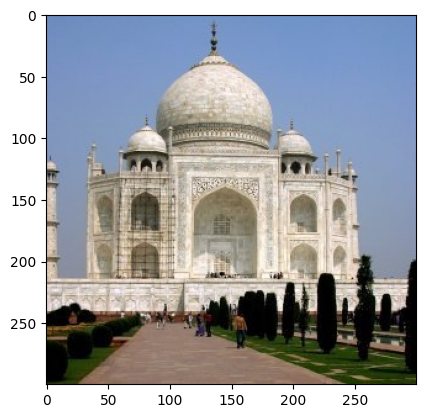

In [361]:
taj_img = read_img('taj.jpg')
plt.imshow(taj_img, cmap='gray')

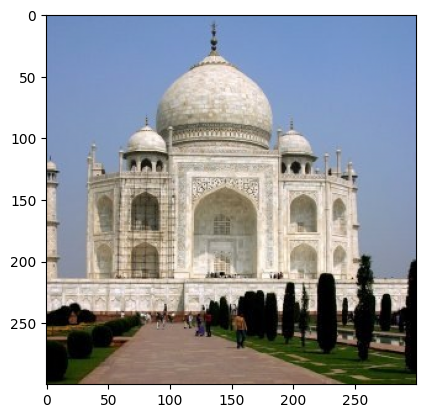

In [381]:
alpha = 0
taj_sharpened = convolve_color(create_sharpening_filter(alpha), taj_img)
save_img('taj_'+str(alpha), taj_sharpened, out_dir=part2_1_out_dir)
plt.imshow(taj_sharpened)

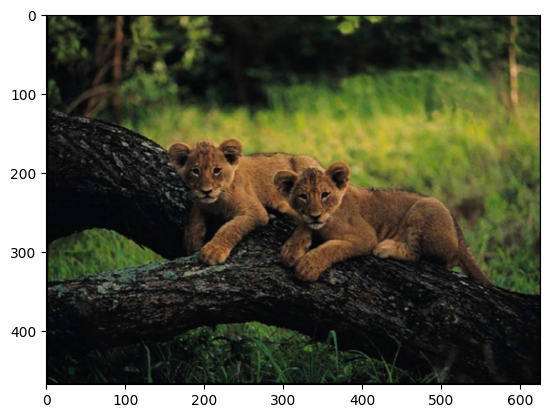

In [380]:
img = read_img('animal.jpg')
alpha = 0
img_sharpened = convolve_color(create_sharpening_filter(alpha), img)
save_img('animal_'+str(alpha), img_sharpened, out_dir=part2_1_out_dir)
plt.imshow(img_sharpened)

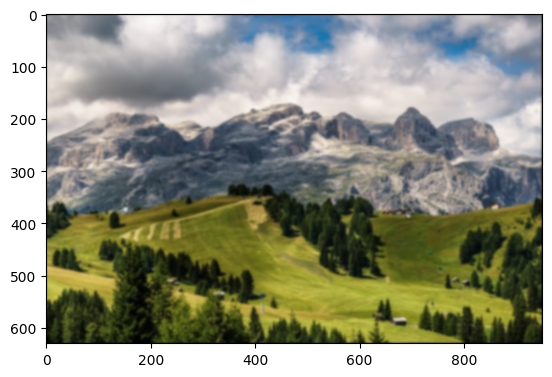

In [486]:
name = 'mountain'
sigma, ksize = 2,13
img = read_img(name+'.jpg')
blurred = convolve_color(create_gaussian_2d(sigma, ksize), img)
plt.imshow(blurred)
save_img(name+'_blurred', blurred, out_dir=part2_1_out_dir)

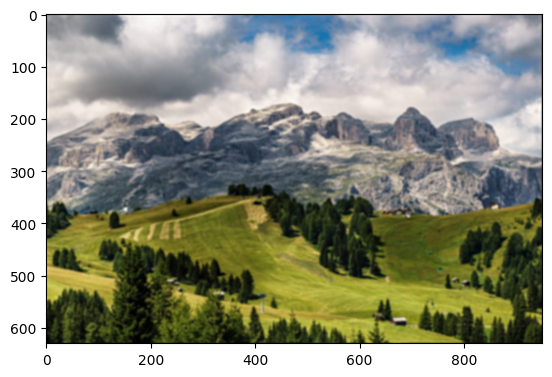

In [489]:
alpha = 1
sharpened = convolve_color(create_sharpening_filter(alpha,sigma,ksize), blurred)
plt.imshow(sharpened)
save_img(name+'_'+str(alpha), sharpened, out_dir=part2_1_out_dir)

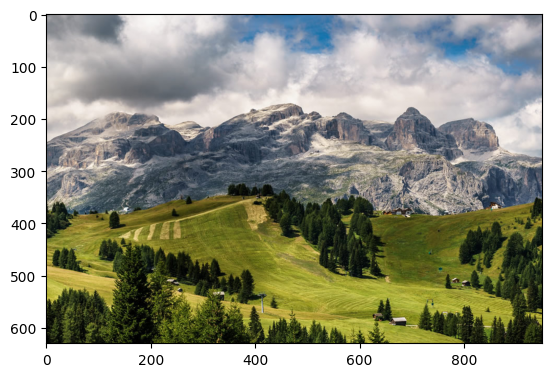

In [481]:
plt.imshow(img)

Evaluation: Resharpening the image after blurring it does not restore all of the original details, but it does considerably improve it over the blurred image. This is because the highest frequencies (fine details) are lost after blurring, and so resharpening can only add to the next highest frequencies.

### Part 2.3: Gaussian and Laplacian Stacks

In [8]:
part2_3_out_dir = part2_out_dir + '/' + 'part2_3'
in_dir = 'images_in/' + 'pyramids'
def rescale_single(a):
    return np.interp(a, (a.min(), a.max()), (0, 1))

def rescale_all_channels(a):
    res = np.zeros_like(a)
    for c in range(a.shape[-1]):
        res[:,:,c] = rescale_single(a[:,:,c])
    return res
    
def create_gaussian_stack(img, levels, sigma=10):
    stack = np.zeros((levels, img.shape[0], img.shape[1], img.shape[2]))
    gaussian_2d = create_gaussian_2d(sigma, opt_ksize(sigma))
    
    stack[0] = img
    prev = stack[0]
    for i in range(1,levels):
        stack[i] = convolve_color(gaussian_2d, prev)
        prev = stack[i]
    return stack

def create_laplacian_stack(gaussian_stack):
    levels = gaussian_stack.shape[0] - 1
    laplacian_stack = np.zeros((levels, gaussian_stack.shape[1], gaussian_stack.shape[2], gaussian_stack.shape[3]))
    
    for i in range(levels):
        laplacian_stack[i] = gaussian_stack[i] - gaussian_stack[i+1]
    return laplacian_stack

def create_stacks(img, levels, sigma=10):
    gaussian_stack = create_gaussian_stack(img, levels+1, sigma)
    laplacian_stack = create_laplacian_stack(gaussian_stack)
    return laplacian_stack, gaussian_stack

def plot_stack(stack, save=False, vertical=False, fname='', show=True):
    levels = stack.shape[0]
    if vertical:
        fig, axes = plt.subplots(levels, 1, figsize=(20, 10))
    else:
        fig, axes = plt.subplots(1, levels, figsize=(10, 20))

    for i, ax in enumerate(axes.flat):
        ax.imshow(rescale_single(stack[i]))  
        ax.axis('off') 
    plt.tight_layout()

    if save:
        plt.savefig('part2_out_dir/part2_3/' + fname + '.jpg',bbox_inches='tight')
    
    if show:
        plt.show()
    
def sum_two_stack(stack1, stack2):
    left = np.sum(stack1, axis=0)
    right = np.sum(stack2, axis=0)
    left_extra_dim = left[np.newaxis, ...]
    right_extra_dim = right[np.newaxis, ...]

    stack1 = np.concatenate((stack1, left_extra_dim))
    stack2 = np.concatenate((stack2, right_extra_dim))

    combined = stack1 + stack2
    return left+right, stack1, stack2, combined

def create_masked_stack(img_stack, mask_stack, invert=False):
    masked_img_stack = np.zeros_like(img_stack)
    if invert:
        mask_stack = 1 - mask_stack
    levels = img_stack.shape[0]
    for i in range(levels):
        masked_img_stack[i] = img_stack[i] * mask_stack[i]
    return masked_img_stack

# Applies the mask onto img1, the inverse onto img2, creates a Laplacian stack, and then returns the collapsed image
def multires_blend(img1, img2, mask, img_sigma=4, mask_sigma=20, levels=6, save=False, fnames=[]):
    new_mask = mask
    if mask.shape != img1.shape:
        new_mask = np.zeros_like(img1)
        new_mask[:,:,0] = mask
        new_mask[:,:,1] = mask
        new_mask[:,:,2] = mask

    img1_laplacian_stack, img1_gaussian_stack = create_stacks(img1, levels, img_sigma)
    img2_laplacian_stack, img2_gaussian_stack = create_stacks(img2, levels, img_sigma)

    img1_laplacian_stack[levels-1] = img1_gaussian_stack[levels]
    img2_laplacian_stack[levels-1] = img2_gaussian_stack[levels]
    
    mask_stack = create_gaussian_stack(new_mask, levels, sigma=mask_sigma)

    masked_stack1 = create_masked_stack(img1_laplacian_stack, mask_stack, invert=False)
    masked_stack2 = create_masked_stack(img2_laplacian_stack, mask_stack, invert=True)
    final_img, left, right, combined = sum_two_stack(masked_stack1, masked_stack2)
    
    plot_stack(left, save=save, fname=fnames[0]+'_masked_stack')
    plot_stack(combined, save=save,fname=fnames[1]+'_masked_stack')
    plot_stack(right, save=save, fname=fnames[2]+'_masked_stack')
    if save:
        save_img(fnames[1], final_img, out_dir='part2_out_dir/part2_4/')
    return final_img, left, combined, right, img1_laplacian_stack, img2_laplacian_stack, img1_gaussian_stack, img2_gaussian_stack
def create_vertical_mask(img):
    left_ones = np.zeros_like(img)
    left_ones[:, :left_ones.shape[1]//2] = 1
    return left_ones

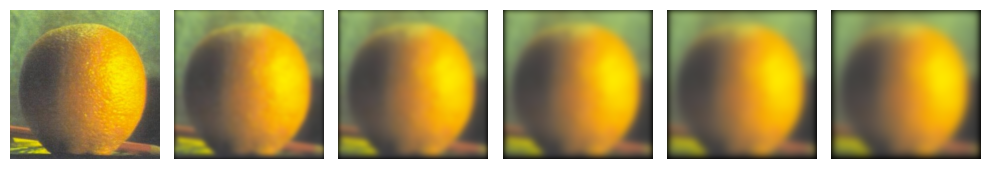

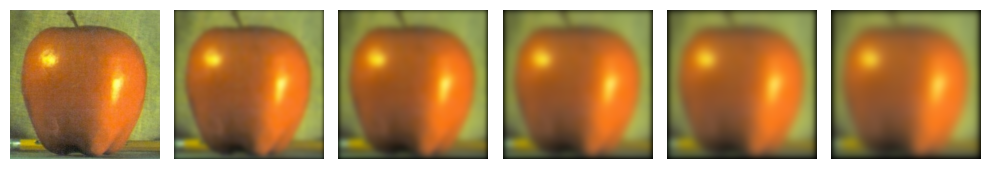

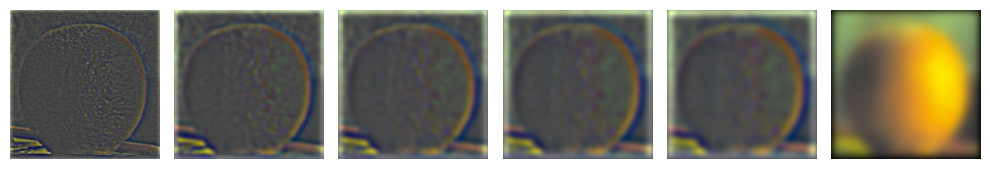

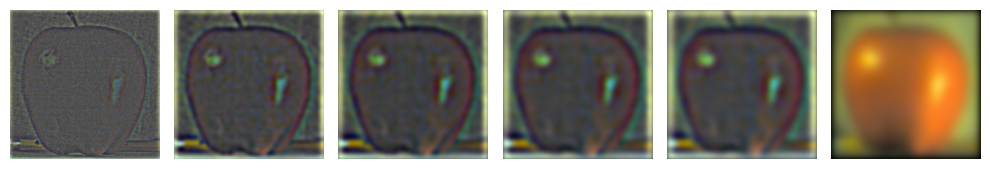

In [9]:
apple_img = read_img('apple.jpg', img_dir=in_dir)
orange_img = read_img('orange.jpg', img_dir=in_dir)

sigma = 4
apple_laplacian_stack, apple_gaussian_stack = create_stacks(apple_img, 6, sigma)
orange_laplacian_stack, orange_gaussian_stack = create_stacks(orange_img, 6, sigma)

plot_stack(orange_gaussian_stack[:-1], save=True, fname='orange_gaussian')
plot_stack(apple_gaussian_stack[:-1], save=True, fname='apple_gaussian')
orange_laplacian_stack[5] = orange_gaussian_stack[6]
apple_laplacian_stack[5] = apple_gaussian_stack[6]

plot_stack(orange_laplacian_stack, save=True, fname='orange_laplacian', show=False)
plot_stack(apple_laplacian_stack, save=True, fname='apple_laplacian', show=False)

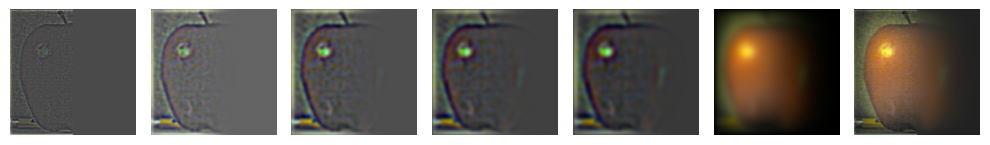

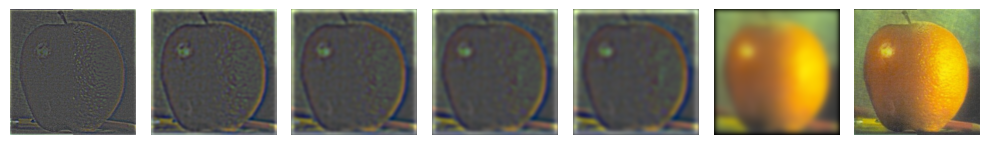

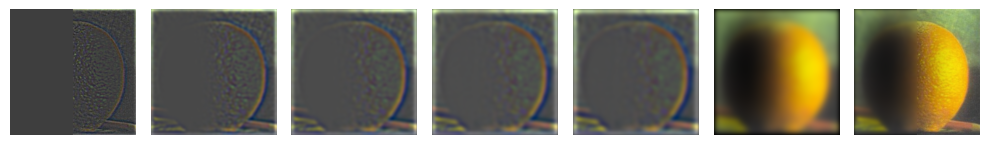

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


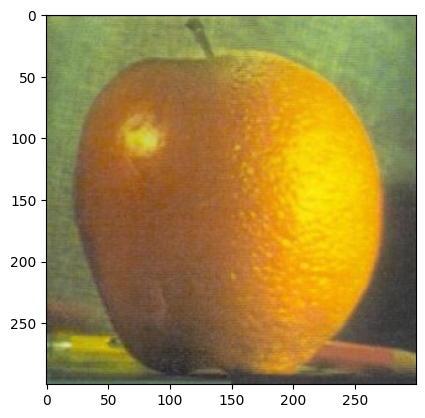

In [10]:
sigma=3
mask_sigma=25
final_img, left, combined, right, _,_,_,_ = multires_blend(apple_img, orange_img, create_vertical_mask(orange_img),
                                                 img_sigma=sigma, mask_sigma=mask_sigma,
                                                 save=True, fnames=['apple', 'oraple', 'orange'])
plt.imshow(final_img)

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


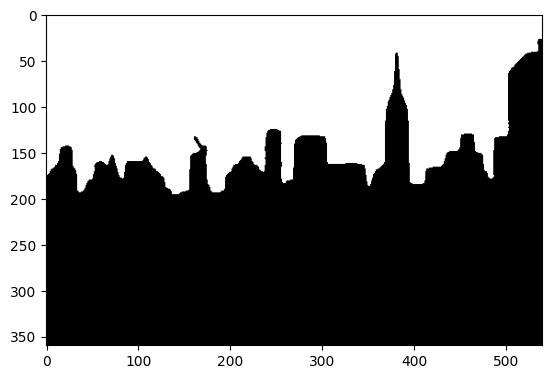

In [16]:
nyc_gs = rgb_2_gray(nyc_img)
segmented = rgb_2_gray(read_img('segmentation.png', img_dir='images_in/blends/'))
h, w = segmented.shape
mask = np.zeros_like(nyc_gs)
mask[:h, :w] = segmented
mask = (mask > 0) * 1
plt.imshow(mask, cmap='gray')
save_img('nyc_mask', mask*255, out_dir='part2_out_dir/part2_4', grayscale=True)

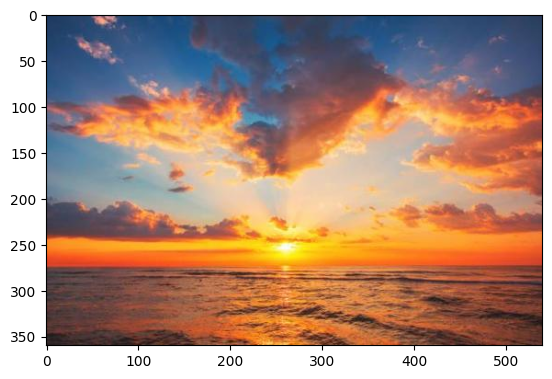

In [17]:
img_dir = 'images_in/blends/'
background = read_img('sunset' + '_resized.jpg', img_dir=img_dir)
plt.imshow(background)

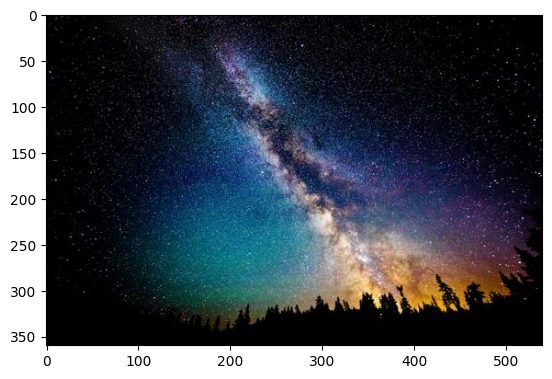

In [18]:
img_dir = 'images_in/blends/'
night_sky = read_img('night_sky' + '_resized.jpg', img_dir=img_dir)
plt.imshow(night_sky)

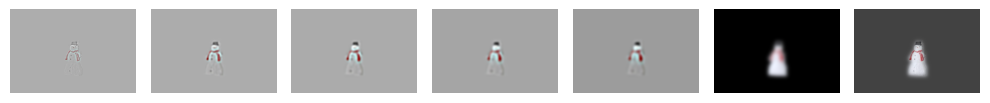

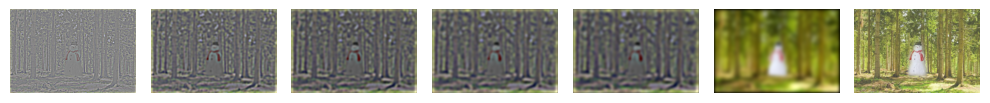

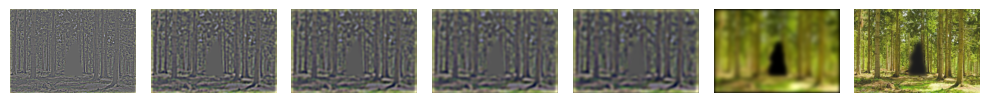

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


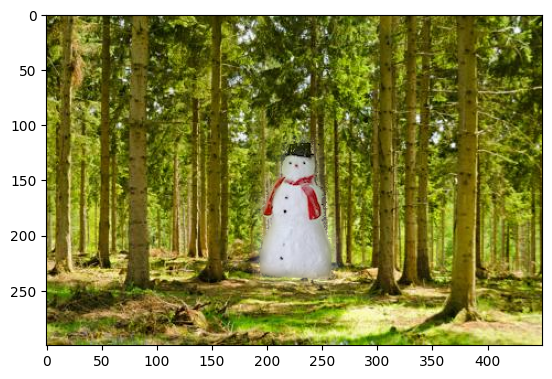

In [125]:
img_sigma = 3
mask_sigma = 3
img_dir = 'images_in/blends/'
mask = read_img('snowman_mask_gray.jpg', img_dir=img_dir)
img1 = read_img('forest_resized.jpg', img_dir=img_dir)
img2 = read_img('snowman.jpg', img_dir=img_dir)

final_img, left, combined, right, sky_l, nyc_l, sky_g, nyc_g = multires_blend(img2, img1, mask,
                                                img_sigma=img_sigma, mask_sigma=mask_sigma,
                                                save=False, fnames=['sunset', 'sunset_nyc', 'nyc'])
plt.imshow(final_img)
save_img('summertime_snowman', final_img, out_dir='part2_out_dir/part2_4/')

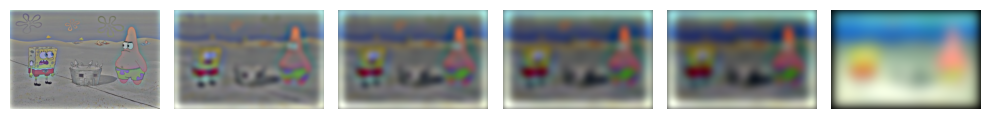

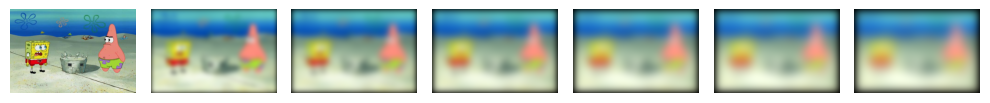

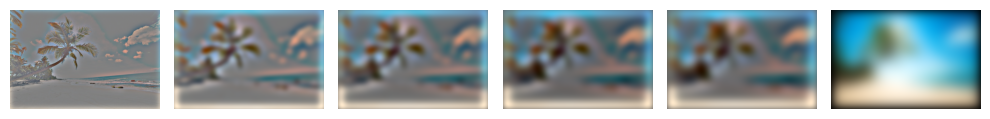

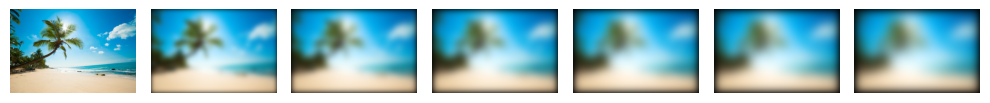

In [81]:
plot_stack(sky_l)
plot_stack(sky_g)
plot_stack(nyc_l)
plot_stack(nyc_g)

In [99]:
img_dir = 'images_in/blends/'
name = 'forest'
img = Image.open(img_dir+name + '.jpg')
print(f"Original size : {beach_img.size}") # 540x360
# spongebob = 'spongebob'
# spongebob_img = Image.open(img_dir+spongebob + '.jpg')
# print(f"Original size : {spongebob_img.size}") # 540x360
img = img.resize((450, 300))
img.save(img_dir+ name + '_resized.jpg')

# spongebob_mask = 'spongebob_mask.png'

# spongebob_mask_img = Image.open(img_dir+spongebob_mask + '.jpg')
# spongebob_mask_img = spongebob_mask_img.resize(spongebob_mask_img.size/3)
# spongebob_mask_img.save(img_dir+ spongebob_mask + '_resized.jpg')

Original size : 583200


In [45]:
spongebob_mask = 'spongebob_mask.jpg'

spongebob_mask_img = Image.open(img_dir+spongebob_mask)
spongebob_mask_img = spongebob_mask_img.resize((540, 360))
spongebob_mask_img.save(img_dir+ spongebob_mask + '_resized.jpg')

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


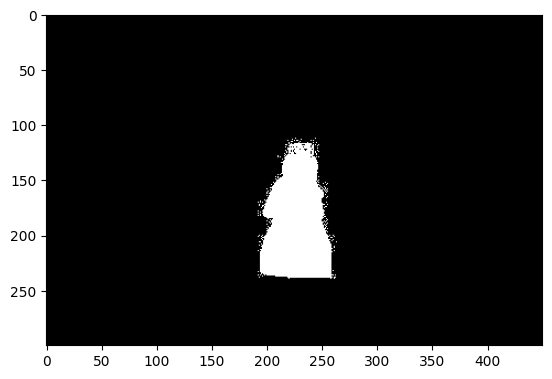

In [105]:
mask = read_img('snowman_mask.jpg', img_dir='images_in/blends/')
mask = rgb_2_gray(mask)
mask = (mask > 0.03) * 1
plt.imshow(mask, cmap='gray')
save_img('snowman_mask_gray', mask*255, out_dir='images_in/blends/', grayscale=True)